In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r'C:\Users\Admin\Downloads\voice.csv'  # Correct file path
df = pd.read_csv(file_path)


# Display basic information about the dataset
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

C:\Users\Admin\AppData\Local\Temp\ipykernel_17868\3946201066.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


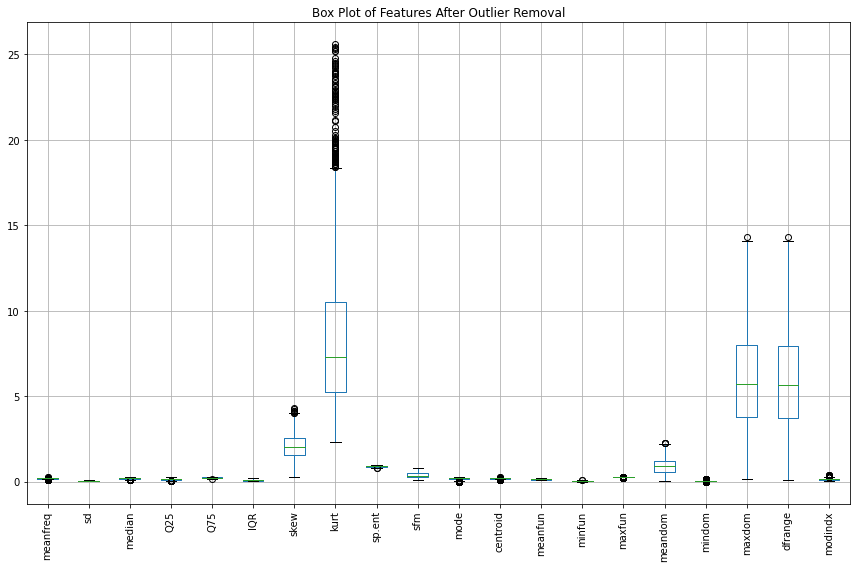

In [2]:
# Handle missing values (if any)
df = df.dropna()

# Detect and handle outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Visualize distributions to check for outliers
plt.figure(figsize=(12, 8))
df_clean.boxplot()
plt.title('Box Plot of Features After Outlier Removal')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [3]:
# Separate features and target
X = df_clean.drop('label', axis=1)
y = df_clean['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Hyperparameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [1, 2, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV with 10-fold cross-validation
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=10, scoring='f1', n_jobs=-1)
grid_search_dt.fit(X_train_scaled, y_train)

# Get the best estimator and evaluate
best_dt = grid_search_dt.best_estimator_
y_train_pred_dt = best_dt.predict(X_train_scaled)
y_test_pred_dt = best_dt.predict(X_test_scaled)

# Print classification report for Decision Tree
print("Decision Tree - Training Performance:")
print(classification_report(y_train, y_train_pred_dt))

print("Decision Tree - Test Performance:")
print(classification_report(y_test, y_test_pred_dt))

# Best hyperparameters for Decision Tree
print(f"Best Decision Tree Parameters: {grid_search_dt.best_params_}")

Decision Tree - Training Performance:
              precision    recall  f1-score   support

      female       0.98      0.98      0.98       747
        male       0.98      0.98      0.98       755

    accuracy                           0.98      1502
   macro avg       0.98      0.98      0.98      1502
weighted avg       0.98      0.98      0.98      1502

Decision Tree - Test Performance:
              precision    recall  f1-score   support

      female       0.97      0.97      0.97       319
        male       0.97      0.97      0.97       326

    accuracy                           0.97       645
   macro avg       0.97      0.97      0.97       645
weighted avg       0.97      0.97      0.97       645

Best Decision Tree Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [9]:
from sklearn.neural_network import MLPClassifier

# Define the FNN model
nn = MLPClassifier(solver='lbfgs', max_iter=4000, random_state=42)

# Hyperparameter grid for FNN
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'alpha': [0.0001, 0.001, 0.01],
    'activation': ['tanh', 'relu']
}

# Perform GridSearchCV with 10-fold cross-validation
grid_search_nn = GridSearchCV(nn, param_grid_nn, cv=10, scoring='f1', n_jobs=-1)
grid_search_nn.fit(X_train_scaled, y_train)

# Get the best estimator and evaluate
best_nn = grid_search_nn.best_estimator_
y_train_pred_nn = best_nn.predict(X_train_scaled)
y_test_pred_nn = best_nn.predict(X_test_scaled)

# Print classification report for FNN
print("FNN - Training Performance:")
print(classification_report(y_train, y_train_pred_nn))

print("FNN - Test Performance:")
print(classification_report(y_test, y_test_pred_nn))

# Best hyperparameters for FNN
print(f"Best FNN Parameters: {grid_search_nn.best_params_}")


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


FNN - Training Performance:
              precision    recall  f1-score   support

      female       1.00      1.00      1.00       747
        male       1.00      1.00      1.00       755

    accuracy                           1.00      1502
   macro avg       1.00      1.00      1.00      1502
weighted avg       1.00      1.00      1.00      1502

FNN - Test Performance:
              precision    recall  f1-score   support

      female       0.98      0.97      0.97       319
        male       0.97      0.98      0.97       326

    accuracy                           0.97       645
   macro avg       0.97      0.97      0.97       645
weighted avg       0.97      0.97      0.97       645

Best FNN Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50,)}


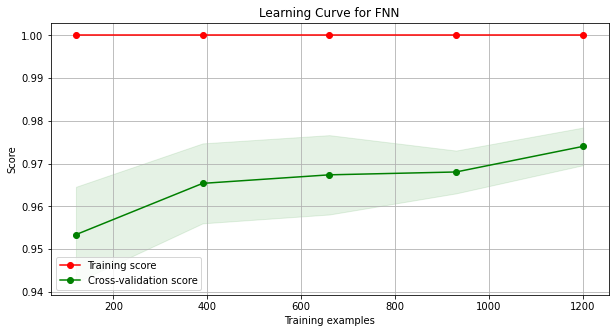

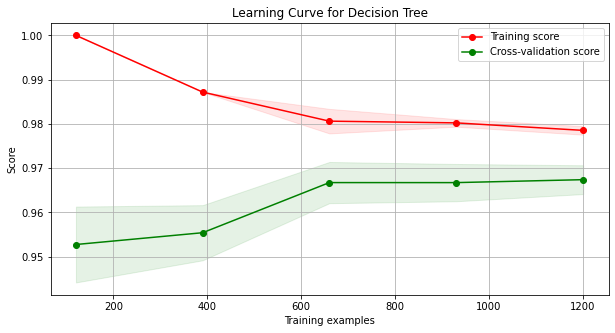

In [15]:
# Plot learning curves
plot_learning_curve(best_nn, "Learning Curve for FNN", X_train_scaled, y_train, cv=5)
plt.show()

plot_learning_curve(best_dt, "Learning Curve for Decision Tree", X_train_scaled, y_train, cv=5)
plt.show()
